# Analysis of crime rate data in São Paulo

In [ ]:
import pandas as pd
from google.colab import files
import io
import matplotlib.pyplot as plt
import folium
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors
import requests

In [ ]:
# Read data
uploaded = files.upload()

df = pd.read_csv(io.StringIO(uploaded['BO_2016_1.csv'].decode('ISO-8859-1')), delimiter=',',  header=0, index_col=0, encoding='ISO-8859-1')
df.head()

    

Saving BO_2016_1.csv to BO_2016_1.csv


,NOME_DELEGACIA_CIRC,RUBRICA,LATITUDE,LONGITUDE,Cidade
37,03ÃÂº D.P. CAMPOS ELISEOS,Furto (art. 155),-23.542476,-46.641928,S.PAULO
136,47ÃÂº D.P. CAPAO REDONDO,Roubo (art. 157),-23.673562,-46.796808,S.PAULO
146,40ÃÂº D.P. VILA STA MARIA,Roubo (art. 157),-23.490940,-46.684299,S.PAULO
147,101ÃÂº D.P. JDIM IMBUIAS,Roubo (art. 157),-23.733969,-46.668915,S.PAULO
162,42ÃÂº D.P. PARQUE S. LUCAS,Roubo (art. 157),-23.595815,-46.550405,S.PAULO


## Preprocessing data

In [ ]:
df[['NOME_DELEGACIA_CIRC']] = df.NOME_DELEGACIA_CIRC.str.replace('[^a-zA-Z' '.]', ' ')
df.dropna(axis=0, how='any', inplace=True)
df.head()

,NOME_DELEGACIA_CIRC,RUBRICA,LATITUDE,LONGITUDE,Cidade
37,D.P. CAMPOS ELISEOS,Furto (art. 155),-23.542476,-46.641928,S.PAULO
136,D.P. CAPAO REDONDO,Roubo (art. 157),-23.673562,-46.796808,S.PAULO
146,D.P. VILA STA MARIA,Roubo (art. 157),-23.490940,-46.684299,S.PAULO
147,D.P. JDIM IMBUIAS,Roubo (art. 157),-23.733969,-46.668915,S.PAULO
162,D.P. PARQUE S. LUCAS,Roubo (art. 157),-23.595815,-46.550405,S.PAULO


In [ ]:
# The database is in portuguese. Let's change the column's names to english.

df.rename(columns={'NOME_DELEGACIA_CIRC': 'Police_Station', 'RUBRICA': 'Crime', 'Cidade': 'City'}, inplace=True)
df.head()

,Police_Station,Crime,LATITUDE,LONGITUDE,City
37,D.P. CAMPOS ELISEOS,Furto (art. 155),-23.542476,-46.641928,S.PAULO
136,D.P. CAPAO REDONDO,Roubo (art. 157),-23.673562,-46.796808,S.PAULO
146,D.P. VILA STA MARIA,Roubo (art. 157),-23.490940,-46.684299,S.PAULO
147,D.P. JDIM IMBUIAS,Roubo (art. 157),-23.733969,-46.668915,S.PAULO
162,D.P. PARQUE S. LUCAS,Roubo (art. 157),-23.595815,-46.550405,S.PAULO


# Analysis

. Number of police stations at the city of São Paulo



In [ ]:

df_unique = df.Police_Station.unique()

print(df_unique)
print('We have' ,df_unique.shape[0], 'police stations at the city of São Paulo')

['       D.P. CAMPOS ELISEOS       ' '       D.P.  CAPAO REDONDO       '
 '       D.P.  VILA STA MARIA      ' '        D.P. JDIM IMBUIAS        '
 '       D.P.  PARQUE S. LUCAS     ' '       D.P.  AGUA FRIA           '
 '       D.P.  FREGUESIA DO O      ' '       D.P.  JABAQUARA           '
 '       D.P. BOM RETIRO           ' '       D.P.  CAMPO LIMPO         '
 '        D.P. COHABII ITAQU.      ' '       D.P. V. P. BARRETO        '
 '       D.P.  V BRASILANDIA       ' '       D.P.  VILA MATILDE        '
 '       D.P.  VILA PRUDENTE       ' '       D.P.  PARQUE S.RAFAEL     '
 '       D.P.  CIDADE ADEMAR       ' '       D.P. LAPA                 '
 '       D.P. P. STO ANTONIO       ' '       D.P. SE                   '
 '       D.P.  DOUTOR ALDO GALIANO ' '       D.P.  TATUAPE             '
 '       D.P. VILA PENTEADO        ' '       D.P.   CARANDIRU          '
 '       D.P.  PARQUE DO CARMO     ' '       D.P.  VILA MARIANA        '
 '       D.P. MON        ES              '
 '      

# Crime rate per region

In [ ]:
df[['Crime']] = df.Crime.str.replace('Ã\x83Â£', 'a')
df[['Crime']] = df.Crime.str.replace('Ã\x83Â§', 'c')
df[['Crime']] = df.Crime.str.replace('Ã\x83Â\xad', 'i')
df[['Crime']] = df.Crime.str.replace('Ã\x83Â¡', 'a')
df[['Crime']] = df.Crime.str.replace('A.I.-', '')
df[['Crime']] = df.Crime.str.replace(r"\(.*\)","")
# Translate crime's names to english
df[['Crime']] = df.Crime.str.replace('Furto ', 'Theft ')
df[['Crime']] = df.Crime.str.replace('Roubo ', 'Robbery')
df[['Crime']] = df.Crime.str.replace('Lesao corporal ', 'Bodily injury ')
df[['Crime']] = df.Crime.str.replace('Porte de entorpecente ', 'Drug possession')
df[['Crime']] = df.Crime.str.replace('Estupro ', 'Rape ')
df[['Crime']] = df.Crime.str.replace('Homicidio simples ', 'Murder')
df[['Crime']] = df.Crime.str.replace('Trafico de entorpecente ', 'Narcotics traffic')
df[['Crime']] = df.Crime.str.replace('Theft de coisa comum ', 'Theft of ordinary thing')
df[['Crime']] = df.Crime.str.replace('Rape de vulneravel ', 'Rape of vulnerable person')
df[['Crime']] = df.Crime.str.replace('Guilty Bodily injury na direcao de veiculo automotor  ', 'Guilty bodily injury driving a motor vehicle')
df[['Crime']] = df.Crime.str.replace('Homicidio culposo na direcao de veiculo automotor ', 'Manslaughter driving a motor vehicle')
df[['Crime']] = df.Crime.str.replace('Bodily injury culposa ', 'Guilty bodily injury ')


df_unique2 = df.Crime.unique()
print('We have' ,df_unique2.shape[0], 'unique crimes at the database')

df_unique2

We have 12 unique crimes at the database


array(['Theft ', 'Robbery', 'Bodily injury ', 'Drug possession',
       'Guilty bodily injury na direcao de veiculo automotor ', 'Rape ',
       'Manslaughter driving a motor vehicle', 'Guilty bodily injury ',
       'Murder', 'Rape of vulnerable person', 'Narcotics traffic',
       'Theft of ordinary thing'], dtype=object)

In [ ]:
# Crime count by region
crime_data = df.groupby(['Police_Station']).size().to_frame(name='Count').reset_index()
crime_data

,Police_Station,Count
0,D.P. COHABII ITAQU.,288
1,D.P. JDIM HERCULANO,358
2,D.P. JDIM IMBUIAS,529
3,D.P. SOCORRO,145
4,D.P. CARANDIRU,597
...,...,...
96,D.P. VILA JACUI,395
97,D.P. VILA JOANIZA,231
98,D.P. VILA PENTEADO,275
99,DEL.POL.COTIA,1


### What is the most common crime at the city of São Paulo?

In [ ]:
crime = df.groupby(['Crime']).size().to_frame(name='Count').reset_index()
crime_sort = crime.sort_values(by='Count', ascending=False)
crime_sort

,Crime,Count
9,Robbery,16448
10,Theft,15193
0,Bodily injury,2467
3,Guilty bodily injury na direcao de veiculo aut...,1217
5,Murder,145
8,Rape of vulnerable person,107
2,Guilty bodily injury,50
7,Rape,49
4,Manslaughter driving a motor vehicle,29
1,Drug possession,4


The data above shows that by far the two most common crimes at the city of São Paulo are Robbery and Theft.

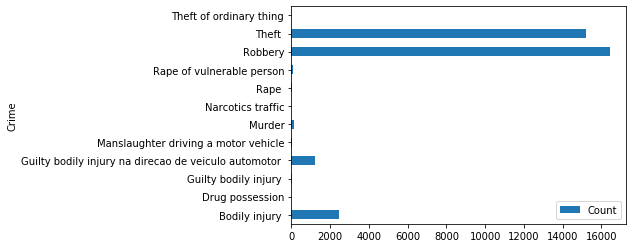

In [ ]:
crime.plot(x='Crime', y='Count', kind='barh')


In [ ]:
# Check some statistics
crime_data.describe()

,Count
count,101.000000
mean,353.623762
std,202.436699
min,1.000000
25%,247.000000
50%,331.000000
75%,446.000000
max,1001.000000


### What neighbourhoods have the highest and lowest crime rate?  

In [ ]:
crime_sorted = crime_data.sort_values(by='Count', ascending=False)
crime_sorted

,Police_Station,Count
84,D.P. PINHEIROS,1001
53,D.P. CAMPOS ELISEOS,893
89,D.P. SE,874
71,D.P. JARDINS,813
57,D.P. CONSOLA O,785
...,...,...
90,D.P. TABO O DA SERRA,2
75,D.P. MAUA,2
86,D.P. S.BERNARDO DO CAMPO,1
99,DEL.POL.COTIA,1


### What is the crime count at D.P. PINHEIROS?
We can see at the table above that D.P. PINHEIROS has the highest crime rate. Let's check the most common crimes.

In [ ]:
# Create a new dataframe containing only D.P. PINHEIROS data
condition = df['Police_Station'].str.strip() == 'D.P. PINHEIROS'
df_pinheiros = df[condition]
crime_pinheiros = df_pinheiros.groupby(['Crime']).size().to_frame(name='Crime_Count').reset_index()
# Sort data
crime_pinheiros_sorted = crime_pinheiros.sort_values(by='Crime_Count', ascending=False)
crime_pinheiros_sorted

,Crime,Crime_Count
5,Theft,730
4,Robbery,208
0,Bodily injury,36
2,Guilty bodily injury na direcao de veiculo aut...,24
1,Guilty bodily injury,2
3,Murder,1


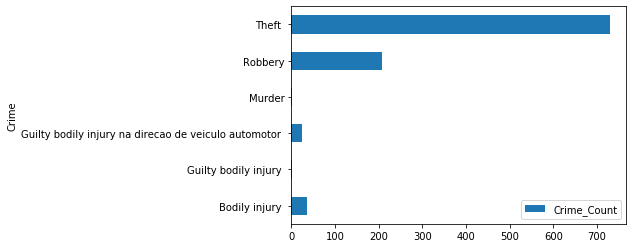

In [ ]:
crime_pinheiros.plot(x='Crime', y='Crime_Count', kind='barh')

### What neighbourhoods have the highest robbery and theft rate?

Since those are the two most common crimes, let's check the neighbourhoods with highest robbery and theft rates in São Paulo

In [ ]:
condition2 = df['Crime'].str.strip() == 'Robbery'
df_robbery = df[condition2]
crime_robbery = df_robbery.groupby(['Police_Station']).size().to_frame(name='Robbery_Count').reset_index()
# Sort data
crime_robbery_sorted = crime_robbery.sort_values(by='Robbery_Count', ascending=False)
crime_robbery_sorted

,Police_Station,Robbery_Count
17,D.P. ITAIM PAULISTA,531
19,D.P. JABAQUARA,431
8,D.P. CAMPO LIMPO,425
32,D.P. SAO MATEUS,389
9,D.P. CAPAO REDONDO,364
...,...,...
58,D.P. DIADEMA,2
86,D.P. S.BERNARDO DO CAMPO,1
61,D.P. GUARULHOS,1
90,D.P. TABO O DA SERRA,1


In [ ]:
condition3 = df['Crime'].str.strip() == 'Theft'
df_theft = df[condition3]
crime_theft = df_theft.groupby(['Police_Station']).size().to_frame(name='Theft_Count').reset_index()
# Sort data
crime_theft_sorted = crime_theft.sort_values(by='Theft_Count', ascending=False)
crime_theft_sorted

,Police_Station,Theft_Count
83,D.P. PINHEIROS,730
71,D.P. JARDINS,583
87,D.P. SE,550
57,D.P. CONSOLA O,518
53,D.P. CAMPOS ELISEOS,515
...,...,...
76,D.P. OSASCO,2
58,D.P. DIADEMA,2
88,D.P. TABO O DA SERRA,1
61,D.P. GUARULHOS,1


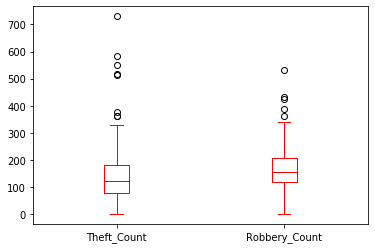

In [ ]:
box_df = pd.concat([crime_theft, crime_robbery], axis = 1)
box_df.plot(kind ='box', color = 'red')

# Clustering Neighbourhoods 

#### Now let's use Folium and Scikit-learn libraries to segment regions of São Paulo in 3 different clusters by crime rates similarity

In [ ]:
crimepivot = df.pivot_table(index='Police_Station', columns='Crime', aggfunc=pd.Series.count, fill_value=0)
crimepivot = crimepivot.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11]]
crimepivot_sorted = crimepivot.sort_values(by='Police_Station', ascending=True)
crimepivot_sorted.head()

City  ...                        
Crime                             Bodily injury   ... Theft of ordinary thing
Police_Station                                    ...                        
        D.P. COHABII ITAQU.                   17  ...                       0
        D.P. JDIM HERCULANO                   37  ...                       0
        D.P. JDIM IMBUIAS                     36  ...                       0
        D.P. SOCORRO                          11  ...                       0
       D.P.   CARANDIRU                       38  ...                       0

[5 rows x 12 columns]

### K-Means algorithm

In [ ]:
X = crimepivot_sorted.values
# Normalization
X_norm = StandardScaler().fit_transform(X)
clusterNum = 3  # Number of Clusters
# Training
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X_norm)
labels = k_means.labels_
df_head = df[['Police_Station','LATITUDE','LONGITUDE']]
df_head = df_head.drop_duplicates(['Police_Station'])
df_head = df_head.sort_values(by='Police_Station', ascending=True)
df_head["Cluster_label"] = labels
df_head.head()

,Police_Station,LATITUDE,LONGITUDE,Cluster_label
286,D.P. COHABII ITAQU.,-23.537850,-46.440149,0
6278,D.P. JDIM HERCULANO,-23.687873,-46.772126,1
147,D.P. JDIM IMBUIAS,-23.733969,-46.668915,2
3009,D.P. SOCORRO,-23.666154,-46.715941,0
694,D.P. CARANDIRU,-23.520247,-46.610418,2


In [ ]:
SP_map = folium.Map(location=[-23.32, -46.38],zoom_start= 10)

# set color scheme for the clusters
x = np.arange(clusterNum)
ys = [i + x + (i*x)**2 for i in range(clusterNum)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lng, point, cluster in zip(df_head['LATITUDE'], df_head['LONGITUDE'], df_head['Police_Station'], df_head['Cluster_label']):
    label = folium.Popup(str(point) + ' Cluster ' + str(cluster), parse_html=True)
    
    folium.CircleMarker([lat, lng],radius=5,popup=label,color=rainbow[cluster-1],fill=True,fill_color=rainbow[cluster-1],fill_opacity=0.7,parse_html=False).add_to(SP_map)

SP_map

### Now let's find what each cluster means in terms of crime rate

In [ ]:
crimepivot_sorted["Cluster_label"] = labels
condition_cluster1 = crimepivot_sorted["Cluster_label"] == 1
df_clus1 = crimepivot_sorted[condition_cluster1]
print('Database contains', df_clus1.shape[0], 'neighbourhoods')
df_clus1['Total'] = (df_clus1.sum(axis=1) - 1)
print('')
print('Crime percentage at cluster 1 (%)')
print('')
print ((df_clus1['City'].sum(axis=0) / df_clus1['Total'].sum(axis=0)) * 100)
print('')
#print('See more Statistics')
#df_clus1.describe()




Database contains 8 neighbourhoods

Crime percentage at cluster 1 (%)

Crime
Bodily injury                                             8.238040
Drug possession                                           0.023337
Guilty bodily injury                                      0.046674
Guilty bodily injury na direcao de veiculo automotor      3.430572
Manslaughter driving a motor vehicle                      0.256709
Murder                                                    0.910152
Narcotics traffic                                         0.070012
Rape                                                      0.326721
Rape of vulnerable person                                 0.630105
Robbery                                                  60.700117
Theft                                                    25.344224
Theft of ordinary thing                                   0.023337
dtype: float64



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
condition_cluster2 = crimepivot_sorted["Cluster_label"] == 2
df_clus2 = crimepivot_sorted[condition_cluster2]
print('Database contains', df_clus2.shape[0], 'neighbourhoods')
df_clus2['Total'] = (df_clus2.sum(axis=1) - 2)
print('')
print('Crime percentage at cluster 2 (%)')
print('')
print ((df_clus2['City'].sum(axis=0) / df_clus2['Total'].sum(axis=0)) * 100)
print('')
#print('See more Statistics')
#df_clus2.describe()



Database contains 35 neighbourhoods

Crime percentage at cluster 2 (%)

Crime
Bodily injury                                             6.630336
Drug possession                                           0.011353
Guilty bodily injury                                      0.153270
Guilty bodily injury na direcao de veiculo automotor      3.332198
Manslaughter driving a motor vehicle                      0.062443
Murder                                                    0.329246
Narcotics traffic                                         0.000000
Rape                                                      0.124886
Rape of vulnerable person                                 0.221390
Robbery                                                  41.502044
Theft                                                    47.615804
Theft of ordinary thing                                   0.017030
dtype: float64



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
condition_cluster0 = crimepivot_sorted["Cluster_label"] == 0
df_clus0 = crimepivot_sorted[condition_cluster0]
print('Database contains', df_clus0.shape[0], 'neighbourhoods')
df_clus0['Total'] = df_clus0.sum(axis=1) 
print('')
print('Crime percentage at cluster 0 (%)')
print('')
print ((df_clus0['City'].sum(axis=0) / df_clus0['Total'].sum(axis=0)) * 100)
print('')
#print('See more Statistics')
#df_clus0.sum(axis=0)#describe()



Database contains 58 neighbourhoods

Crime percentage at cluster 0 (%)

Crime
Bodily injury                                             6.847629
Drug possession                                           0.007239
Guilty bodily injury                                      0.152009
Guilty bodily injury na direcao de veiculo automotor      3.496200
Manslaughter driving a motor vehicle                      0.050670
Murder                                                    0.347448
Narcotics traffic                                         0.000000
Rape                                                      0.094101
Rape of vulnerable person                                 0.296779
Robbery                                                  47.310894
Theft                                                    41.397032
Theft of ordinary thing                                   0.000000
dtype: float64



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


##### As you can see, cluster 0 and 2 are much more similar to each other, while cluster 1 looks a bit different, mainly because of theft rate that it is much smaller than in the previous two and murder rate that is up than three times bigger. It is interesting to note that cluster 1 is comprised almost by peripheric areas of the city and probably consists of low income neighborhoods,these areas also have a higher rate of Rape and Narcotics traffic, which is equal to zero for cluster 0 and 2. I can conclude that cluster 1 embrace the more violent regions of the city. 

# FOURSQUARE 

Define Foursquare Credentials and Version




In [ ]:
CLIENT_ID = 'OUQ1SJKGP2RAF5EFE4CVVVN4GKEKU3YAPP1DW2NYLGS5V42Y' # your Foursquare ID
CLIENT_SECRET = 'OVZQPEDDOT2BWSGUAMPVYJ3CAE4IXCXFI23OUFBTYZ1J5SEG' # your Foursquare Secret
VERSION = '20181201' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: OUQ1SJKGP2RAF5EFE4CVVVN4GKEKU3YAPP1DW2NYLGS5V42Y
CLIENT_SECRET:OVZQPEDDOT2BWSGUAMPVYJ3CAE4IXCXFI23OUFBTYZ1J5SEG


In [ ]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000, LIMIT=100):    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng,            
            v['venue']['name'], 
            v['venue']['id'],
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Location', 
                  'Location Latitude', 
                  'Location Longitude', 
                  'Venue',
                  'Venue id',                
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category'        
                   ]
    
    return(nearby_venues)

### Let's get nearby venues

In [ ]:
df_four = df[['Police_Station','LATITUDE','LONGITUDE']]
df_four = df_four.drop_duplicates(['Police_Station'])

SP_data_venues = getNearbyVenues(names=df_four['Police_Station'],
                                   latitudes=df_four['LATITUDE'],
                                   longitudes=df_four['LONGITUDE']
                                  )


       D.P. CAMPOS ELISEOS       
       D.P.  CAPAO REDONDO       
       D.P.  VILA STA MARIA      
        D.P. JDIM IMBUIAS        
       D.P.  PARQUE S. LUCAS     
       D.P.  AGUA FRIA           
       D.P.  FREGUESIA DO O      
       D.P.  JABAQUARA           
       D.P. BOM RETIRO           
       D.P.  CAMPO LIMPO         
        D.P. COHABII ITAQU.      
       D.P. V. P. BARRETO        
       D.P.  V BRASILANDIA       
       D.P.  VILA MATILDE        
       D.P.  VILA PRUDENTE       
       D.P.  PARQUE S.RAFAEL     
       D.P.  CIDADE ADEMAR       
       D.P. LAPA                 
       D.P. P. STO ANTONIO       
       D.P. SE                   
       D.P.  DOUTOR ALDO GALIANO 
       D.P.  TATUAPE             
       D.P. VILA PENTEADO        
       D.P.   CARANDIRU          
       D.P.  PARQUE DO CARMO     
       D.P.  VILA MARIANA        
       D.P. MON        ES              
       D.P. JARDIM MIRIAM        
       D.P.  ITAIM PAULISTA      
       D

In [ ]:
print(SP_data_venues.shape)
SP_data_venues.head()

(6080, 8)


,Location,Location Latitude,Location Longitude,Venue,Venue id,Venue Latitude,Venue Longitude,Venue Category
0,D.P. CAMPOS ELISEOS,-23.542476,-46.641928,Rinconcito Peruano,568fc995498e1040a2ff1686,-23.541967,-46.643470,Peruvian Restaurant
1,D.P. CAMPOS ELISEOS,-23.542476,-46.641928,Pizzaria Central,531f9ebe498e0abd4b380fe0,-23.540897,-46.642866,Pizza Place
2,D.P. CAMPOS ELISEOS,-23.542476,-46.641928,Rinconcito Peruano,4d10cc97a3d9721e8145d7fd,-23.540275,-46.640536,Peruvian Restaurant
3,D.P. CAMPOS ELISEOS,-23.542476,-46.641928,Hey Coffee,5b3810cbc97f28002c22ec96,-23.544408,-46.640680,Coffee Shop
4,D.P. CAMPOS ELISEOS,-23.542476,-46.641928,Teatro SESC 24 de Maio,59fa6c836f0aa23a2098fd43,-23.543618,-46.639776,Theater


In [ ]:
print('There are {} unique venue categories.'.format(len(SP_data_venues['Venue Category'].unique())))
print('')
print('There are {} unique venues.'.format(len(SP_data_venues['Venue id'].unique())))

There are 349 unique venue categories.

There are 5778 unique venues.


### Venue count by region

Let's find the number of venues at each neighbourhood

In [ ]:
venue_data = SP_data_venues.groupby(['Location']).size().to_frame(name='Venue_Count').reset_index()
venue_data_sorted = venue_data.sort_values(by='Venue_Count', ascending = False)
venue_data_sorted


,Location,Venue_Count
50,D.P. BOM RETIRO,100
34,D.P. TATUAPE,100
38,D.P. VILA CARRAO,100
39,D.P. VILA GUSTAVO,100
41,D.P. VILA MARIANA,100
...,...,...
10,D.P. CID. TIRADENTES,13
21,D.P. PARELHEIROS,13
27,D.P. PERUS,7
2,D.P. JDIM IMBUIAS,5


### What is the most common venue at the city of São Paulo?

In [ ]:
venue_category = SP_data_venues.groupby(['Venue Category']).size().to_frame(name='Venue_Category_Count').reset_index()
venue_category_sorted = venue_category.sort_values(by='Venue_Category_Count', ascending = False)
venue_category_sorted

,Venue Category,Venue_Category_Count
26,Bakery,322
245,Pizza Place,311
43,Brazilian Restaurant,247
28,Bar,198
145,Gym / Fitness Center,185
...,...,...
228,Paintball Field,1
277,Science Museum,1
276,School,1
105,Entertainment Service,1


### What venues are most common at the locations with highest and lowest crime rate?

In [ ]:
# Create a new dataframe containing only D.P. PINHEIROS data
condition_venue = SP_data_venues['Location'].str.strip() == 'D.P. PINHEIROS'
df_pinheiros2 = SP_data_venues[condition_venue]
venue_pinheiros = df_pinheiros2.groupby(['Venue Category']).size().to_frame(name='Venue Category_Count').reset_index()
# Sort data
venue_pinheiros_sorted = venue_pinheiros.sort_values(by='Venue Category_Count', ascending=False)
print('Pinheiros has', venue_pinheiros_sorted['Venue Category_Count'].sum(), 'venues')
print('')
venue_pinheiros_sorted

Pinheiros has 100 venues



,Venue Category,Venue Category_Count
2,Bar,8
1,Art Gallery,6
7,Burger Joint,4
5,Brazilian Restaurant,3
47,Restaurant,3
...,...,...
34,Middle Eastern Restaurant,1
35,Movie Theater,1
36,Music Store,1
37,Music Venue,1


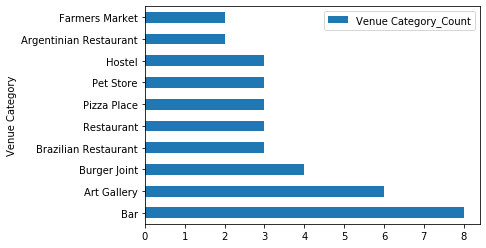

In [ ]:
venue_pinheiros_sorted_10 = venue_pinheiros_sorted.head(10)
venue_pinheiros_sorted_10.plot(x='Venue Category', y='Venue Category_Count', kind='barh')

In [ ]:
# Now, let's check a place with the lowest crime rate
condition_venue2 = SP_data_venues['Location'].str.strip() == 'DEL.POL.COTIA'
df_cotia = SP_data_venues[condition_venue2]
venue_cotia = df_cotia.groupby(['Venue Category']).size().to_frame(name='Venue Category_Count').reset_index()
# Sort data
venue_cotia_sorted = venue_cotia.sort_values(by='Venue Category_Count', ascending=False)
print('Cotia has', venue_cotia_sorted['Venue Category_Count'].sum(), 'venues')
print('')
venue_cotia_sorted

Cotia has 5 venues



,Venue Category,Venue Category_Count
0,Bakery,1
1,Brazilian Restaurant,1
2,Fast Food Restaurant,1
3,Pharmacy,1
4,Pizza Place,1


### Is crime level, specially theft rates, correlated to the number of venues?

###### Looking to the two examples above the neighbourhood with highest number of venues (Pinheiros) also has the highest theft rate and the same happens to Cotia, which has only five venues and a low theft rate, let's check if there is a correlation.

In [ ]:
venue_data_sorted2 = venue_data.sort_values(by='Location', ascending = True)
crime_sorted2 = crime_data.sort_values(by='Police_Station', ascending=True)
df_corr = pd.concat([venue_data_sorted2,crime_sorted2], axis = 1)
df_corr

,Location,Venue_Count,Police_Station,Count
0,D.P. COHABII ITAQU.,29,D.P. COHABII ITAQU.,288
1,D.P. JDIM HERCULANO,28,D.P. JDIM HERCULANO,358
2,D.P. JDIM IMBUIAS,5,D.P. JDIM IMBUIAS,529
3,D.P. SOCORRO,65,D.P. SOCORRO,145
4,D.P. CARANDIRU,90,D.P. CARANDIRU,597
...,...,...,...,...
96,D.P. VILA JACUI,35,D.P. VILA JACUI,395
97,D.P. VILA JOANIZA,71,D.P. VILA JOANIZA,231
98,D.P. VILA PENTEADO,21,D.P. VILA PENTEADO,275
99,DEL.POL.COTIA,5,DEL.POL.COTIA,1


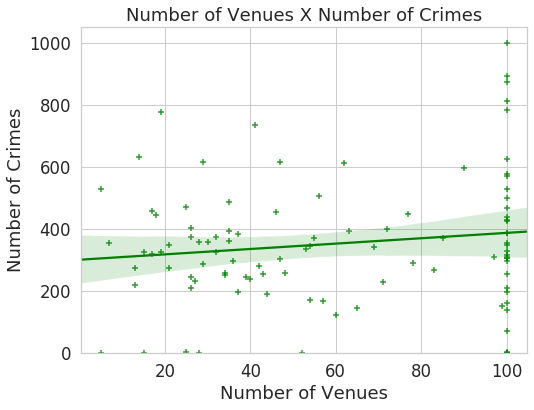

In [ ]:
import seaborn as sns

sns.set(font_scale=1.5)
sns.set_style('whitegrid') # Put a whitegrid
plt.figure(figsize=(8, 6))

ax = sns.regplot(x="Venue_Count", y="Count", data=df_corr, color='green', marker='+')#, scatter_kws={'s': 50})
plt.ylim(0,)

ax.set(xlabel='Number of Venues', ylabel='Number of Crimes') # add x- and y-labels
ax.set_title('Number of Venues X Number of Crimes') # add title
plt.show()

In [ ]:
# PEARSON CORRELATION AND P-VALUE
from scipy import stats
pearson_coef, p_value = stats.pearsonr(df_corr['Venue_Count'], df_corr['Count'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.1434107901446711  with a P-value of P = 0.1525082373867819


##### Foursquare API apparently limits a max value of 100 venues per location. Nevertheless the plot and Pearson Correlation shows that there is no correlation between number of venues and number of crimes.

# Clustering Neighbourhoods 2

#### Now let's use Folium, Foursquare and Scikit-learn libraries to segment regions of São Paulo in 3 different clusters by crime rates and venues similarity

In [ ]:
crimepivot_sorted2 = crimepivot.sort_values(by='Police_Station', ascending=True)
#crimepivot_sorted2.head()
venuepivot = SP_data_venues.pivot_table(index='Location', columns='Venue Category', aggfunc=pd.Series.count, fill_value=0)
venuepivot_sorted = venuepivot.sort_values(by='Location', ascending=True)
#venuepivot_sorted
df_knn = pd.concat([venuepivot_sorted, crimepivot_sorted2], axis = 1)
df_knn


Location Latitude  ...                    City
Venue Category                                  ATM  ... Theft of ordinary thing
        D.P. COHABII ITAQU.                       0  ...                       0
        D.P. JDIM HERCULANO                       0  ...                       0
        D.P. JDIM IMBUIAS                         0  ...                       0
        D.P. SOCORRO                              0  ...                       0
       D.P.   CARANDIRU                           0  ...                       0
...                                             ...  ...                     ...
       D.P. VILA JACUI                            0  ...                       0
       D.P. VILA JOANIZA                          0  ...                       0
       D.P. VILA PENTEADO                         0  ...                       0
DEL.POL.COTIA                                     0  ...                       0
DEL.POL.ITAQUAQUECETUBA                           0  ...                       0

[101 rows x 2106 columns]

# K-Means algorithm 2

In [ ]:
X2 = df_knn.values
# Normalization
X_norm2 = StandardScaler().fit_transform(X2)
clusterNum = 3  # Number of Clusters
# Training
k_means2 = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means2.fit(X_norm2)
labels2 = k_means2.labels_
df_head2 = df[['Police_Station','LATITUDE','LONGITUDE']]
df_head2 = df_head2.drop_duplicates(['Police_Station'])
df_head2 = df_head2.sort_values(by='Police_Station', ascending=True)
df_head2["Cluster_label"] = labels2
df_head2.head()

,Police_Station,LATITUDE,LONGITUDE,Cluster_label
286,D.P. COHABII ITAQU.,-23.537850,-46.440149,1
6278,D.P. JDIM HERCULANO,-23.687873,-46.772126,1
147,D.P. JDIM IMBUIAS,-23.733969,-46.668915,1
3009,D.P. SOCORRO,-23.666154,-46.715941,1
694,D.P. CARANDIRU,-23.520247,-46.610418,2


In [ ]:
SP_map2 = folium.Map(location=[-23.32, -46.38],zoom_start= 10)

# set color scheme for the clusters
x = np.arange(clusterNum)
ys = [i + x + (i*x)**2 for i in range(clusterNum)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lng, point, cluster in zip(df_head2['LATITUDE'], df_head2['LONGITUDE'], df_head2['Police_Station'], df_head2['Cluster_label']):
    label = folium.Popup(str(point) + ' Cluster ' + str(cluster), parse_html=True)
    
    folium.CircleMarker([lat, lng],radius=5,popup=label,color=rainbow[cluster-1],fill=True,fill_color=rainbow[cluster-1],fill_opacity=0.7,parse_html=False).add_to(SP_map2)

SP_map2

##### As we can see above, considering venue and crime data we have mainly two great clusters, the first is located at the city center and the second embrace peripherical regions.